In [1]:
from denoising.datasets import load_bsd300
from denoising.datasets import load_dataset
from denoising.datasets import extract_patches
from denoising.datasets import add_noise

from images.visualization import show, show_images

from settings import BSD300_DIR

In [7]:
imgs = load_bsd300(BSD300_DIR)
patches = extract_patches(imgs, begin=(0,0), stride=10,
    dimension=(50,50), quantity_per_image=(5,2))

y_train, y_test = load_dataset(patches, shuffle=True, split=(80,20))

g_train = add_noise(y_train, noise='gaussian', mean=0.0, var=0.01)
g_test = add_noise(y_test, noise='gaussian', mean=0.0, var=0.01)

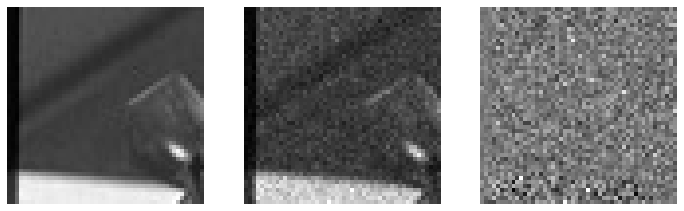

In [8]:
show_images(y_train[100], g_train[100], g_train[100] - y_train[100])

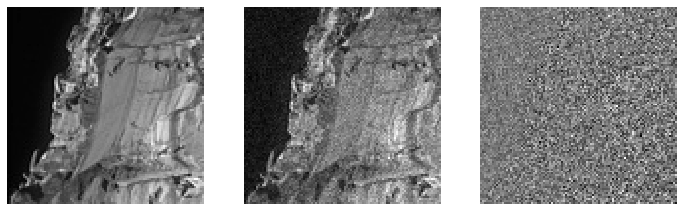

In [7]:
x_train = add_noise(y_train, noise='poisson')
x_test = add_noise(y_test, noise='poisson')

show_images(y_train[100], x_train[100], x_train[100] - y_train[100])

# BM3D

In [20]:
import math

standard_deviation = math.sqrt(0.01)
standard_deviation

std = standard_deviation

In [9]:
from denoising.methods.traditional.bm3d import BM3D

predicted = BM3D(g_test, noise_std_dev=0.1)

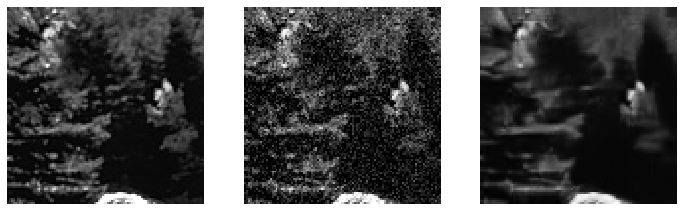

In [22]:
show_images(y_test[100], g_test[100], predicted[100])

In [16]:
from denoising.metrics import psnr

from denoising.utils import normalize


In [17]:
noisy_psnr = psnr(y_test, normalize(g_test, data_type='int'))
noisy_psnr.mean()

20.29756464716714

In [18]:
import numpy as np

In [19]:
bm3d_psnr = psnr(y_test, normalize(predicted, data_type='int'))
bm3d_psnr.mean()

26.91640294156893

## NLM 

In [23]:
from denoising.methods.traditional.non_local_means import NLM

nlm_output = NLM(g_test, noise_std_dev=0.1)

In [26]:
nlm_psnr = psnr(y_test, normalize(nlm_output, data_type='int'))
nlm_psnr.mean()

28.022856101349518

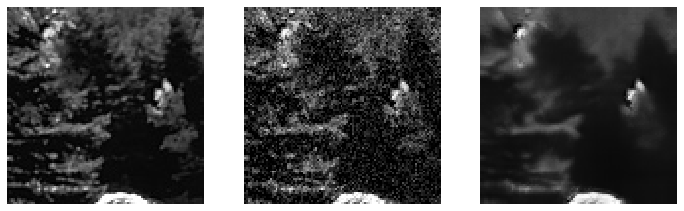

In [27]:
show_images(y_test[100], g_test[100], nlm_output[100])